# Smoothing

In many applications, mass spectrometric data should be smoothed first
before further analysis

In [ ]:
from urllib.request import urlretrieve
import pyopenms as oms

gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
urlretrieve(
    gh + "/src/data/peakpicker_tutorial_1_baseline_filtered.mzML",
    "tutorial.mzML",
)

exp = oms.MSExperiment()
gf = oms.GaussFilter()
param = gf.getParameters()
param.setValue("gaussian_width", 1.0)  # needs wider width
gf.setParameters(param)

oms.MzMLFile().load("tutorial.mzML", exp)
gf.filterExperiment(exp)
oms.MzMLFile().store("tutorial.smoothed.mzML", exp)

We can now load our data into
[TOPPView](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-TOPPView)
to observe the effect of the smoothing, which becomes apparent when we
overlay the two files (drag onto each other) and then zoom into a given
mass range using Ctrl-G and select $4030$ to $4045$:

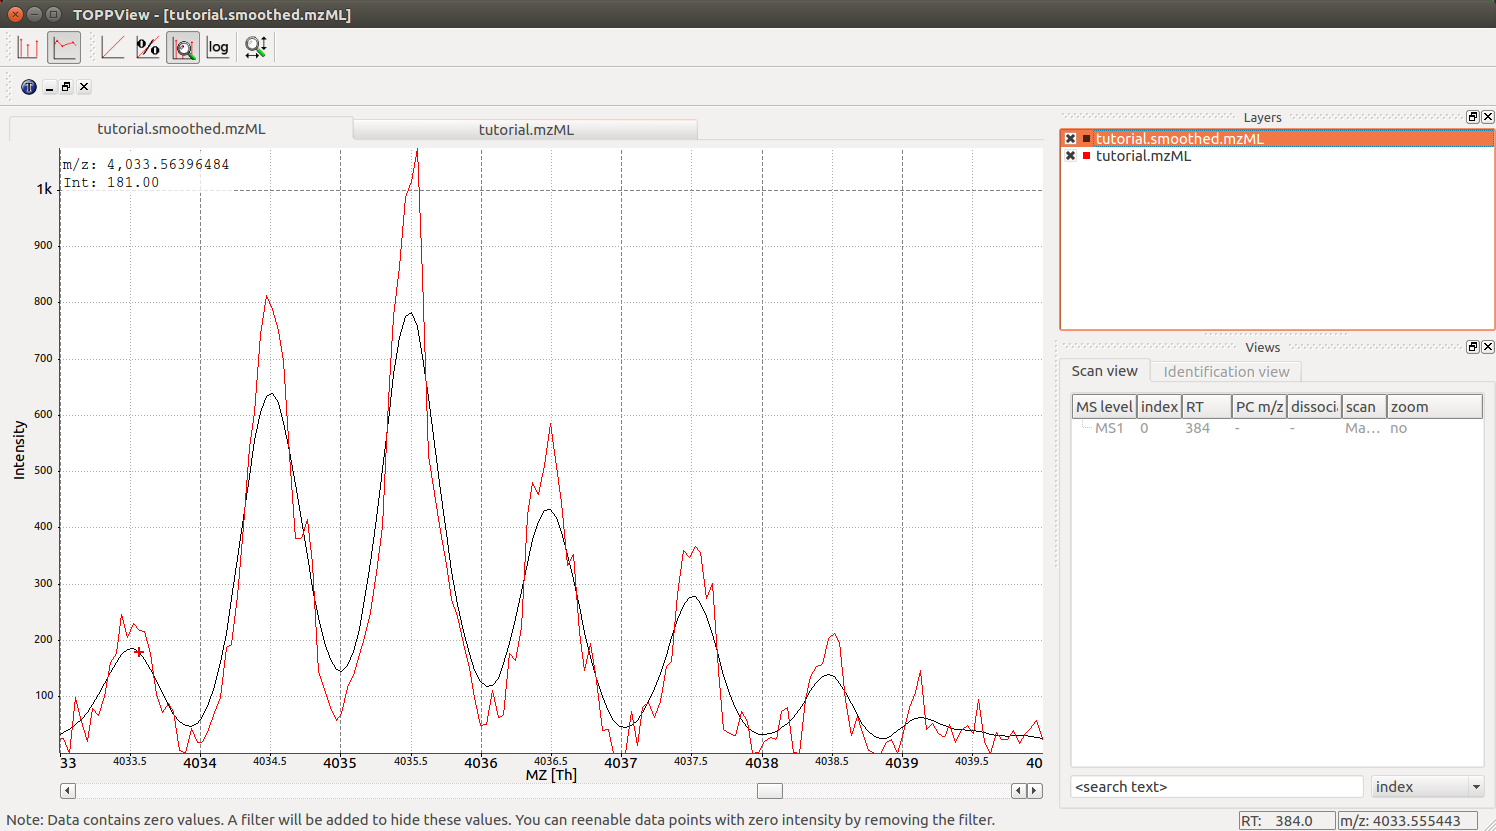

In the screenshot above we see the original data (red) and the smoothed
data (black), indicating that the smoothing does clean up noise in the
data significantly and will prepare the data for downstream processing,
such as peak-picking.